In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/CNN-RNN-3

/content/drive/MyDrive/CNN-RNN-3


In [ ]:
!ls

CNN-RNN1.h5	  gloveCNN1.h5	glovey.csv  PPx.csv  test.csv	valid.csv
glove.6B.50d.txt  glovex.csv	model.png   PPy.csv  train.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')
test.shape,valid.shape,train.shape

((2140, 3), (2140, 3), (6420, 3))

Preprocessing

In [ ]:
train['label'] = train['label'].replace('real',1)
train['label'] = train['label'].replace('fake',0)
test['label'] = test['label'].replace('real',1)
test['label'] = test['label'].replace('fake',0)
valid['label'] = valid['label'].replace('real',1)
valid['label'] = valid['label'].replace('fake',0)


In [ ]:
train = train.append(test)
train = train.append(valid)
train.dropna()
train=train.reset_index(drop=True)

In [ ]:
x=train["tweet"]
y=np.array(train["label"])
x.shape,y.shape
y

array([1, 1, 0, ..., 0, 0, 1])

Removing stop words

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(x)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', x[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889

Tokenizing

In [ ]:

corpus

['cdc current report death gener discrep death count differ sourc small explic death toll stand roughli peopl today',
 'state report death small rise last tuesday southern state report death http co yasgrtt ux',
 'polit correct woman almost use pandem excus reus plastic bag http co thf gunfp coronaviru nashvil',
 'indiafightscorona covid test laboratori india th august test done profbhargava dg icmrdelhi staysaf indiawillwin http co yh zxknnhz',
 'popul state gener larg case count look new case per million today smaller state show case per million california texa al ar id ks ky la ms nv sc http co pyw cwra',
 'covid act found averag person illinoi covid infect peopl data show infect growth rate declin time factor stay home order restrict put place http co hhigdd fe',
 'test posit covid symptom stay home away peopl learn cdc recommend around other covid infect http co z kkxpqkyb http co pami rxaf',
 'obama call trump coronaviru respons chaotic disast http co dedqzehasb',
 'clearli obama

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer                    
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=150000)
tokenizer.fit_on_texts(corpus)
x = tokenizer.texts_to_sequences(corpus)

In [ ]:

x

[[80,
  102,
  9,
  10,
  300,
  3092,
  10,
  433,
  261,
  439,
  691,
  7000,
  10,
  601,
  416,
  1649,
  12,
  19],
 [8, 9, 10, 691, 197, 52, 944, 2295, 8, 9, 10, 2, 1, 7001, 4124],
 [1266,
  752,
  417,
  484,
  41,
  28,
  2296,
  4125,
  1789,
  1148,
  2,
  1,
  7002,
  7003,
  6,
  993],
 [27,
  3,
  5,
  157,
  11,
  133,
  249,
  5,
  482,
  1883,
  1363,
  151,
  121,
  143,
  2,
  1,
  7004,
  7005],
 [255,
  8,
  300,
  434,
  4,
  433,
  231,
  7,
  4,
  113,
  53,
  19,
  1790,
  8,
  33,
  4,
  113,
  53,
  357,
  446,
  1568,
  2297,
  1884,
  2009,
  2010,
  1080,
  1791,
  2011,
  2506,
  2,
  1,
  7006,
  7007],
 [3,
  383,
  200,
  129,
  118,
  1503,
  3,
  32,
  12,
  39,
  33,
  32,
  1118,
  36,
  450,
  34,
  1119,
  114,
  60,
  309,
  205,
  351,
  346,
  2,
  1,
  7008,
  2143],
 [5,
  29,
  3,
  116,
  114,
  60,
  444,
  12,
  92,
  80,
  313,
  220,
  181,
  3,
  32,
  2,
  1,
  266,
  7009,
  2,
  1,
  7010,
  7011],
 [728, 153, 43, 6, 206, 4126, 108

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
maxlen = 50

x = pad_sequences(x, padding='post', maxlen=maxlen)
x


array([[  80,  102,    9, ...,    0,    0,    0],
       [   8,    9,   10, ...,    0,    0,    0],
       [1266,  752,  417, ...,    0,    0,    0],
       ...,
       [1256, 3591, 2477, ...,    0,    0,    0],
       [5012,   22,    3, ...,    0,    0,    0],
       [ 297,    7,    6, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y,x.shape

(array([1, 1, 0, ..., 0, 0, 1]), (10700, 50))

SPLITTING DATA SET

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
x_train=x[0:6420]
x_test=x[6420:8560]
x_valid=x[8560:12788]
y_train=y[0:6420]
y_test=y[6420:8560]
y_valid=y[8560:12788]
x_train.shape,x_test.shape,x_valid.shape,y_train.shape,y_test.shape,y_valid.shape

((6420, 50), (2140, 50), (2140, 50), (6420,), (2140,), (2140,))

Glove pretrained embeddings

In [ ]:
# uncomment if gloVe file is not istalled
!wget http://nlp.stanford.edu/data/glove.6B.zip 
!unzip glove*.zip

--2021-04-27 22:52:25--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-04-27 22:52:25--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-04-27 22:52:25--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
  
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

embedding_dim = 100
embedding_matrix = create_embedding_matrix('glove.6B.100d.txt',
                                            tokenizer.word_index,  
                                            embedding_dim)

MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=True))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

TRAINING

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=8,
                    validation_data=(x_valid, y_valid),
                    batch_size=20)

Epoch 1/8
321/321 [==============================] - 16s 45ms/step - loss: 0.4617 - accuracy: 0.7885 - val_loss: 0.2469 - val_accuracy: 0.9112
Epoch 2/8
321/321 [==============================] - 14s 42ms/step - loss: 0.1818 - accuracy: 0.9347 - val_loss: 0.1927 - val_accuracy: 0.9224
Epoch 3/8
321/321 [==============================] - 14s 43ms/step - loss: 0.0769 - accuracy: 0.9754 - val_loss: 0.2428 - val_accuracy: 0.9196
Epoch 4/8
321/321 [==============================] - 15s 46ms/step - loss: 0.0387 - accuracy: 0.9892 - val_loss: 0.2648 - val_accuracy: 0.9313
Epoch 5/8
321/321 [==============================] - 15s 47ms/step - loss: 0.0196 - accuracy: 0.9945 - val_loss: 0.2261 - val_accuracy: 0.9290
Epoch 6/8
321/321 [==============================] - 16s 50ms/step - loss: 0.0244 - accuracy: 0.9953 - val_loss: 0.3033 - val_accuracy: 0.9374
Epoch 7/8
321/321 [==============================] - 14s 44ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.3752 - val_accuracy: 0.9266

RESULTS

In [ ]:
#load model with best results
# from tensorflow import keras
# model = tf.keras.models.load_model('gloveCNN1.h5')

In [ ]:
from math import floor
from sklearn.metrics import classification_report, confusion_matrix
def performance(x_test, y_test):
  y_pred=model.predict(x_test)
  # print(y_pred[0])
  y_pred=[1 if x>=0.5 else 0 for x in y_pred]
  # print(y_pred[0])
  cm=confusion_matrix(y_test, y_pred)
  cr=classification_report(y_test, y_pred)

  print("Confusion matrix=\n",cm)
  print("Classification report=\n",cr)

  loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
  print("Testing Accuracy: {:.2f}%".format(accuracy*100))#actual accuracy
  print("Testing Loss: {:.2f}%".format(loss*100)) #testing loss

#call the performance measure function
performance(x_test, y_test)

Confusion matrix=
 [[ 961   59]
 [  64 1056]]
Classification report=
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1020
           1       0.95      0.94      0.94      1120

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Testing Accuracy: 94.25%
Testing Loss: 31.07%


Plotting graph

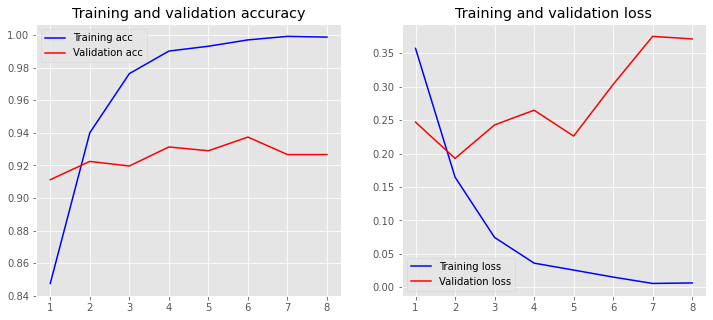

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()



plot_history(history)

In [ ]:

#save model
model.save('gloveCNN1.h5')

